Activity 3: Convert and Transform Raw Data

Input Data Set : Gaming, Jobs and Broadband

In [44]:
install.packages("dplyr")
install.packages("methods")
install.packages("sqldf")
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message:
“package ‘methods’ is not available (for R version 3.3.2)”Warning message:
“package ‘methods’ is a base package, and should not be updated”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [45]:
library("dplyr")
library("methods")
library("sqldf")
library("ggplot2")

In [46]:
#Loading the data from the file CSV.csv
data = read.csv("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv")

In [47]:
#nrow(data)
#ncol(data)
#colnames(data)
#head(data)

My topics:

Smartphone Ownership

Internet Usage

Job search using the internet

Video Game Popularity

Questions:

Q1. Usage of smartphone with repect to age group and gender.

Q2. Usage of internet with repect to age group and gender.

Q3. Plot for number of people playing video games with respect to age group and gender.

Q4. Plot for number of people agreeing with the statement "Most people who play video games are men" with respect to age group and gender.

Q5. Plot for number of people using a smartphone as part of jobsearch.

In [48]:
#Considering only the required columns
new_data = data %>% select(psraid,sex,age,eminuse,intmob,smart1,smjob1,smjob2a,game1,game3a)

#dim(new_data)

Determining the age group:

Referred from the dataset.

97: 97 or older

98	Don't know

99	Refused

Groups are determined as follows:

Group 1: Ages 18-30

Group 2: Ages 31-60

Group 3: Ages 61 and older.


In [49]:
for(i in(1:nrow(new_data)))
    {
    if(new_data$age[i] >= 18  && new_data$age[i] < 31)
        {
        new_data$age_group[i] = 1
    }
    if(new_data$age[i] >= 31 && new_data$age[i] < 61)
        {
        new_data$age_group[i] = 2
    }
    if(new_data$age[i] >= 61 && new_data$age[i] <= 97)
        {
        new_data$age_group[i] = 3
    }
}

Referred from http://rstudio-pubs-static.s3.amazonaws.com/25402_590f6acfb2544355883f8dcf1c441dc6.html

Q1. Usage of smartphone with repect to age group and gender.

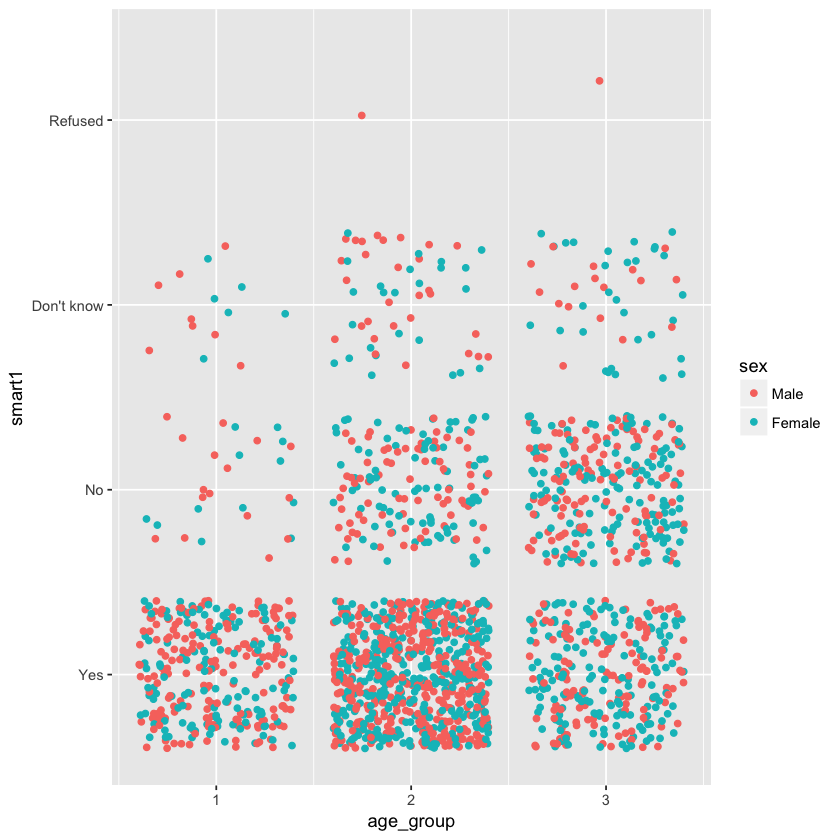

In [50]:
ans1 = new_data %>% select(psraid,sex,age_group,smart1)
#Omitting rows with NA values
ans1 = na.omit(ans1)

ans1 <- within(ans1, sex <- factor(sex, labels = c("Male", "Female")))
ans1 <- within(ans1, smart1 <- factor(smart1, labels = c("Yes", "No","Don't know","Refused")))
qplot(age_group, smart1, colour = sex, data=ans1, geom="jitter")

Hypothesis1 : Most of the smartphone users belong to the age_group 2.

Q2. Usage of internet with repect to age group and gender.

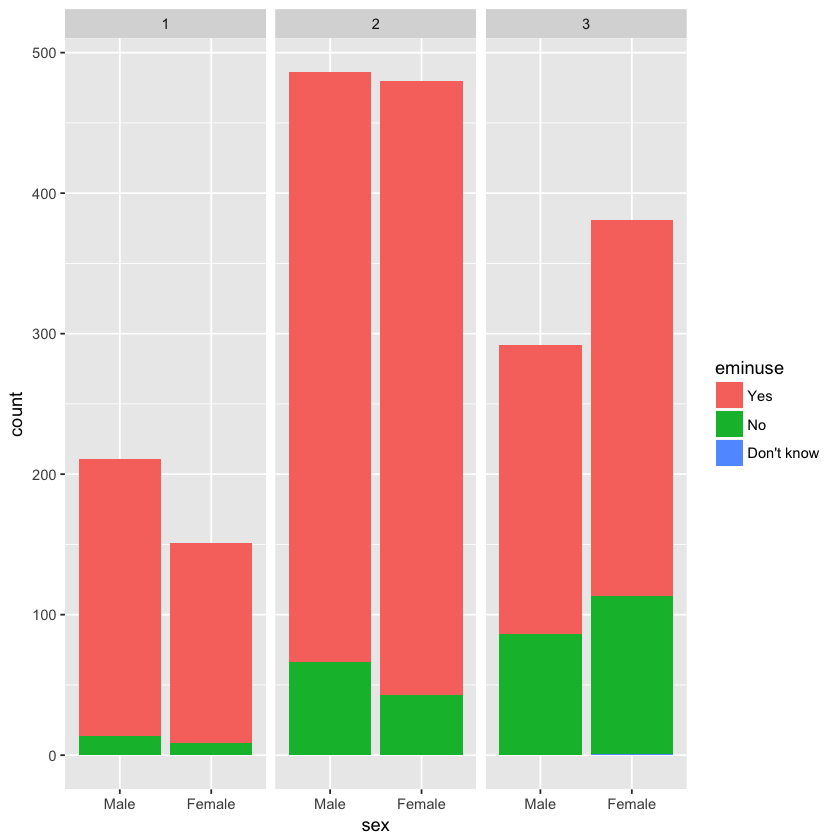

In [51]:
ans2 = new_data %>% select(psraid,sex,age_group,eminuse)
#Omitting rows with NA values
ans2 = na.omit(ans2)

ans2 <- within(ans2, sex <- factor(sex, labels = c("Male", "Female")))
ans2 <- within(ans2, eminuse <- factor(eminuse, labels = c("Yes", "No","Don't know")))
qplot(sex, data=ans2, geom="bar", facets = . ~ age_group, fill=eminuse)

Hypothesis2 : Internet is used by both male and female and the users belong to the age group 2.

Q3. Plot for number of people playing video games with respect to age group and gender.

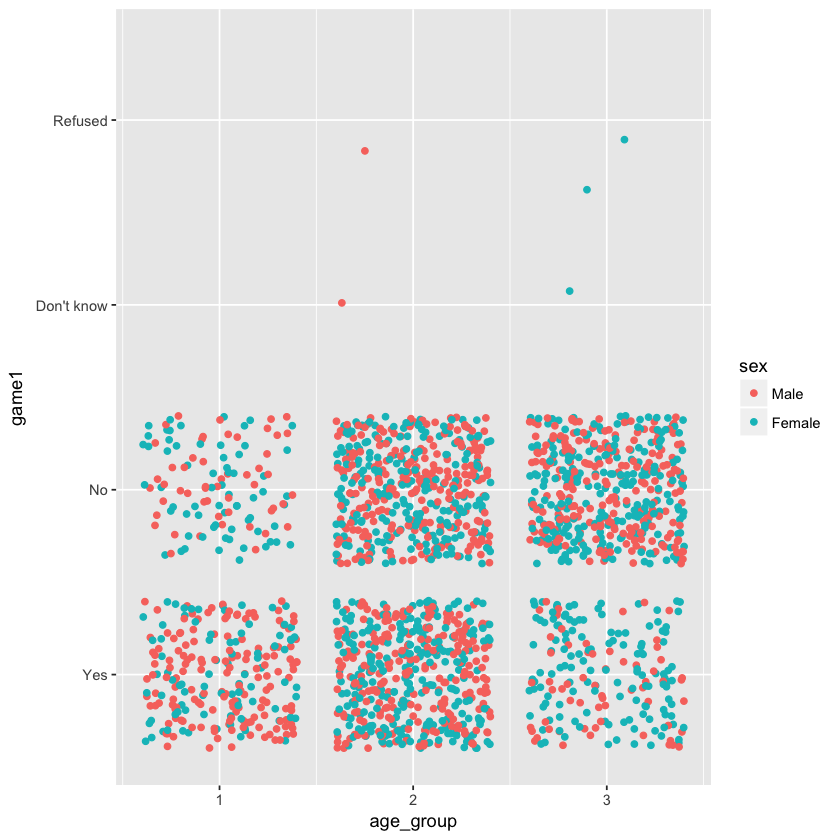

In [52]:
ans3 = new_data %>% select(psraid,sex,age_group,game1)
#Omitting rows with NA values
ans3 = na.omit(ans3)

ans3 <- within(ans3, sex <- factor(sex, labels = c("Male", "Female")))
ans3 <- within(ans3, game1 <- factor(game1, labels = c("Yes", "No","Don't know","Refused")))
qplot(age_group, game1, colour = sex, data=ans3, geom="jitter")

Hpothesis 3: Users with ages belonging to 31-60 play video games more than any other users with the users mostly being male. 

Q4. Plot for number of people agreeing with the statement "Most people who play video games are men" with respect to age group and gender.

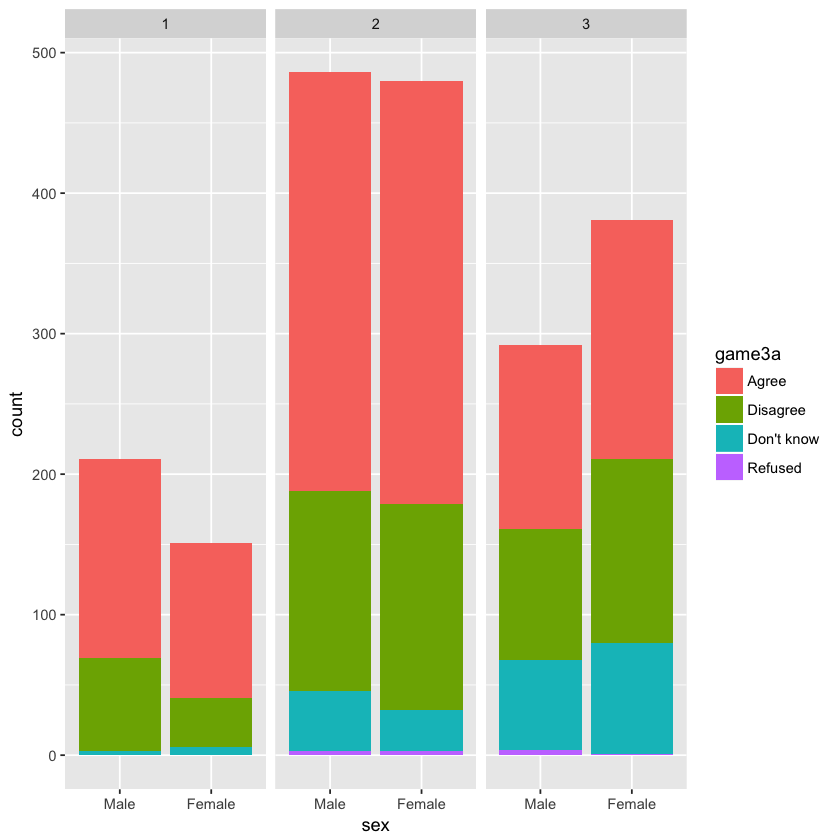

In [53]:
ans4 = new_data %>% select(psraid,sex,age_group,game3a)
#Omitting rows with NA values
ans4 = na.omit(ans4)

ans4 <- within(ans4, sex <- factor(sex, labels = c("Male", "Female")))
ans4 <- within(ans4, game3a <- factor(game3a, labels = c("Agree", "Disagree","Don't know","Refused")))
qplot(sex, data=ans4, geom="bar", facets = . ~ age_group, fill=game3a)

Hypothesis 4: Most people agree with statement of "Most of the users who play video games are men".

Q5. Plot for number of people using a smartphone as part of jobsearch.

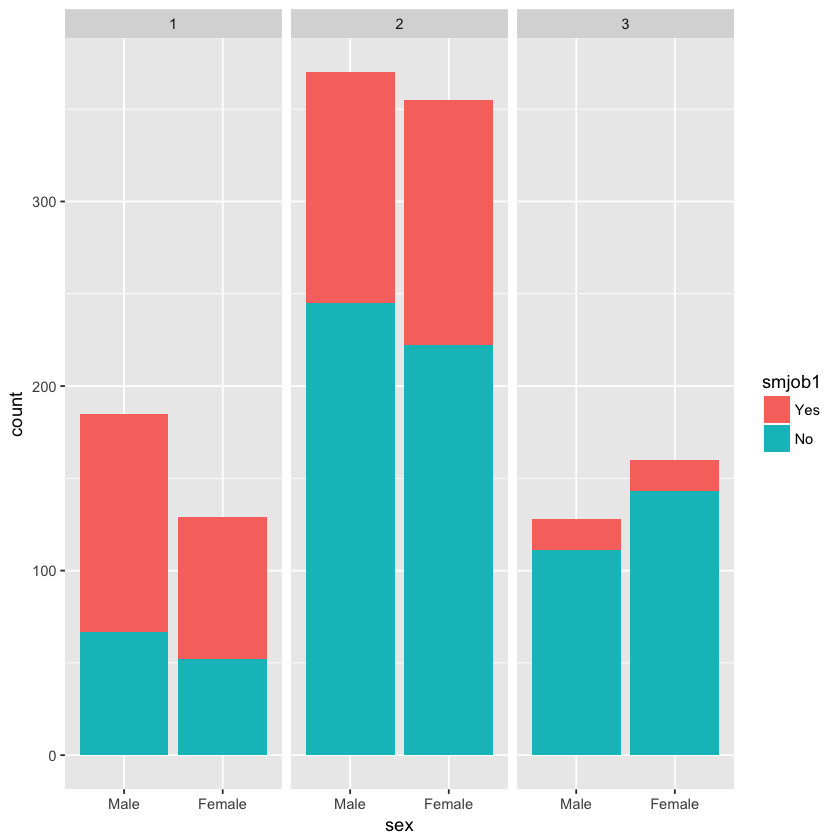

In [54]:
ans5 = new_data %>% select(psraid,sex,age_group,smjob1)
#Omitting rows with NA values
ans5 = na.omit(ans5)

ans5 <- within(ans5, sex <- factor(sex, labels = c("Male", "Female")))
ans5 <- within(ans5, smjob1 <- factor(smjob1, labels = c("Yes", "No")))
qplot(sex, data=ans5, geom="bar", facets = . ~ age_group, fill=smjob1)

Hypothesis 5: People with ages between 31-60 use internet to search an browse jobs.